In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Titanic-Dataset.csv' , usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.shape


(891, 3)

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
X_train , X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [11]:
clf=DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test , y_pred)

0.6223776223776224

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10, scoring='accuracy'))

np.float64(0.6316901408450704)

In [50]:
kbins_age=KBinsDiscretizer(n_bins=15, strategy='quantile', encode='ordinal')
kbins_fare=KBinsDiscretizer(n_bins=15, strategy='quantile', encode='ordinal')

In [51]:
trf=ColumnTransformer(transformers=[
    ('first',kbins_age,[0]),
    ('second', kbins_fare, [1])
],remainder='passthrough')

In [52]:
trf.transformers

[('first', KBinsDiscretizer(encode='ordinal', n_bins=15), [0]),
 ('second', KBinsDiscretizer(encode='ordinal', n_bins=15), [1])]

In [53]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

c:\Users\DSingh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\DSingh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [54]:
X_train_trf.shape

(571, 2)

In [55]:
X_train.shape

(571, 2)

In [56]:
print(len(X_train['Age']))
print(len(X_train_trf[:,0]))


571
571


In [57]:
trf.named_transformers_['first'].n_bins_

array([15])

In [58]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [59]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [60]:
checking = pd.DataFrame({
    'age':X_train['Age'].values,
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'].values,
    'fare_trf':X_train_trf[:,1]
})

checking

,age,age_trf,fare,fare_trf
0,31.0,8.0,20.5250,8.0
1,26.0,6.0,14.4542,7.0
2,30.0,8.0,16.1000,7.0
3,33.0,9.0,7.7750,2.0
4,25.0,6.0,13.0000,6.0
...,...,...,...,...
566,46.0,12.0,61.1750,12.0
567,25.0,6.0,13.0000,6.0
568,41.0,11.0,134.5000,14.0
569,33.0,9.0,20.5250,8.0


In [61]:
checking['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
checking['fare_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [62]:
checking.head()

,age,age_trf,fare,fare_trf,age_labels,fare_labels
0,31.0,8.0,20.5250,8.0,"(21.0, 23.0]","(18.75, 26.0]"
1,26.0,6.0,14.4542,7.0,"(35.0, 38.0]","(31.275, 51.479]"
2,30.0,8.0,16.1000,7.0,NaN,NaN
3,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(31.275, 51.479]"
4,25.0,6.0,13.0000,6.0,"(32.0, 35.0]","(31.275, 51.479]"


In [63]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2= clf.predict(X_test_trf)

In [64]:
accuracy_score(y_pred, y_test)

0.6223776223776224

In [65]:
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring='accuracy'))

np.float64(0.6317097026604068)

In [67]:
def discretizer(bins, strategy):
    kbins_age=KBinsDiscretizer(n_bins=bins, strategy=strategy, encode='ordinal')
    kbins_fare=KBinsDiscretizer(n_bins=bins, strategy=strategy, encode='ordinal')

    trf=ColumnTransformer(transformers=[
        ('first',kbins_age,[0]),
        ('second',kbins_fare,[1])
    ])

    X_trf=trf.fit_transform(X)

    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring='accuracy')))

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(1,2,2)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")
    
    plt.show()

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(1,2,2)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")
    
    plt.show()

c:\Users\DSingh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\DSingh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6317292644757433


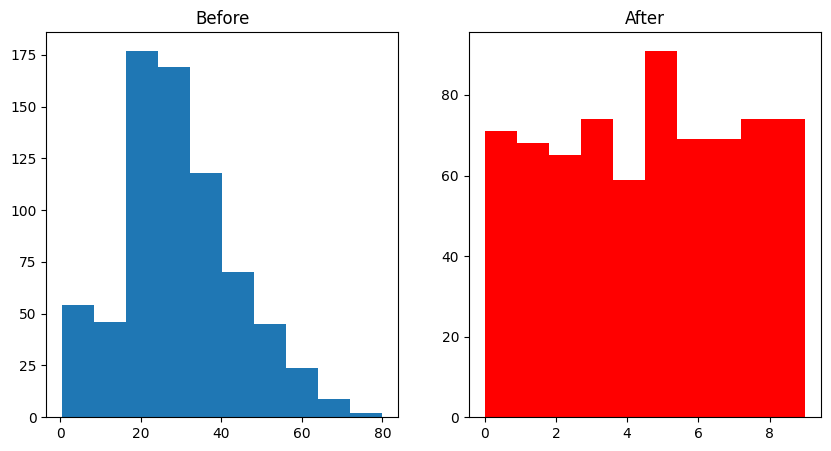

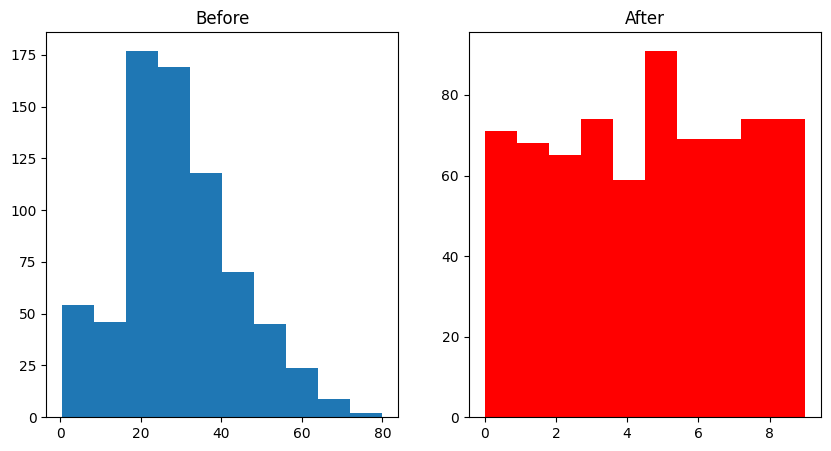

In [69]:
discretizer(10,'quantile')

0.6316901408450704


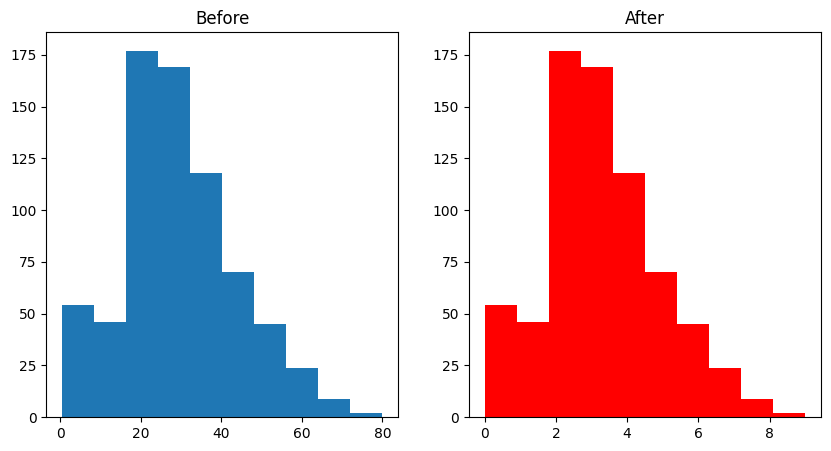

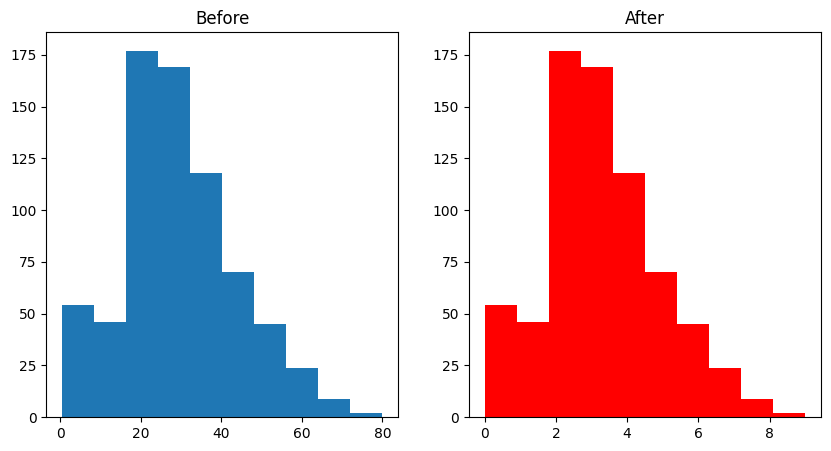

In [70]:
discretizer(10,'uniform')

0.6344874804381846


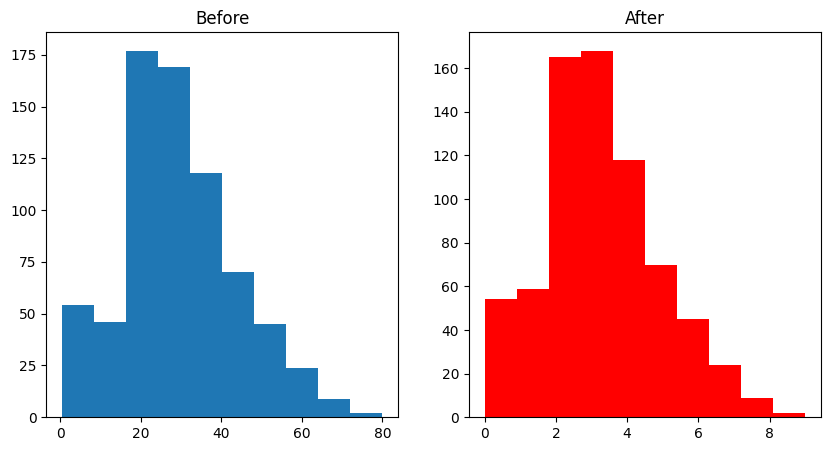

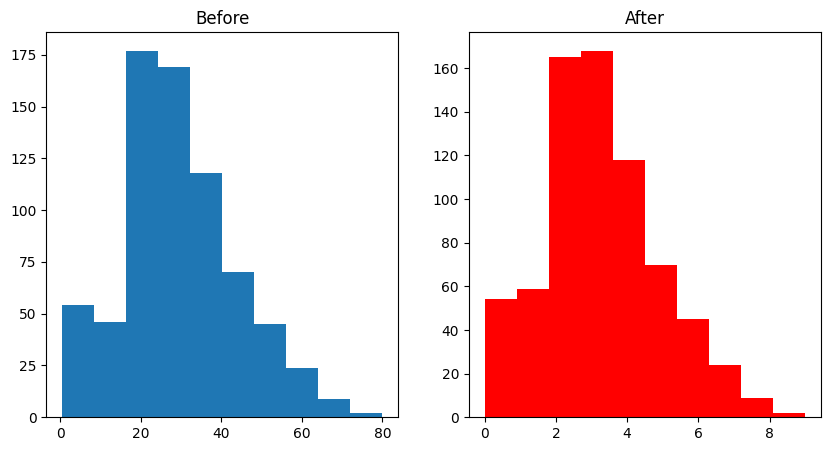

In [72]:
discretizer(10,'kmeans')